In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/train.csv')

# 4가지 변수 추출
# com_reg_ver_win_rate : Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산
# historical_existing_cnt : 이전에 Converted(영업 전환) 되었던 횟수
# response_corporate : 담당 자사 법인명
# lead_owner : 영업 담당자 이름
df = df.iloc[:,[3,7,19,27,-1]]
print(df.head())
print('\n*bant_submit 변수 제외*')

   com_reg_ver_win_rate  historical_existing_cnt response_corporate  \
0              0.066667                      NaN              LGEPH   
1              0.066667                     12.0              LGEPH   
2              0.088889                    144.0              LGEIL   
3              0.088889                      NaN              LGEIL   
4              0.088889                      NaN              LGEIL   

   lead_owner  is_converted  
0           0          True  
1           1          True  
2           2          True  
3           3          True  
4           4          True  
*bant_submit 변수 제외*


# lead_owner

## target(is_converted) ~ lead_owner

In [5]:
df['lead_owner'].value_counts()

lead_owner
174    4627
175    4120
97     2499
23     2453
194    2208
       ... 
481       1
909       1
979       1
111       1
756       1
Name: count, Length: 984, dtype: int64

In [24]:
### 클래스별 is_converted 비율
class_conversion_ratio = df.groupby('lead_owner')['is_converted'].mean().reset_index()

class_conversion_ratio_sorted = class_conversion_ratio.sort_values(by='is_converted', ascending=False).reset_index(drop=True)

sub_group = class_conversion_ratio_sorted[class_conversion_ratio_sorted['is_converted'] < 1.0]
len_now = len(sub_group)
print(f'conversion ratio 1 : {984 - len_now}')
sub_group = sub_group[sub_group['is_converted'] > 0.0]
print(f'conversion ratio 0 : {len_now - len(sub_group)}')
print(f'between 0 and 1 : {len(sub_group)}')

conversion ratio 1 : 94
conversion ratio 0 : 479
between 0 and 1 : 411


C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


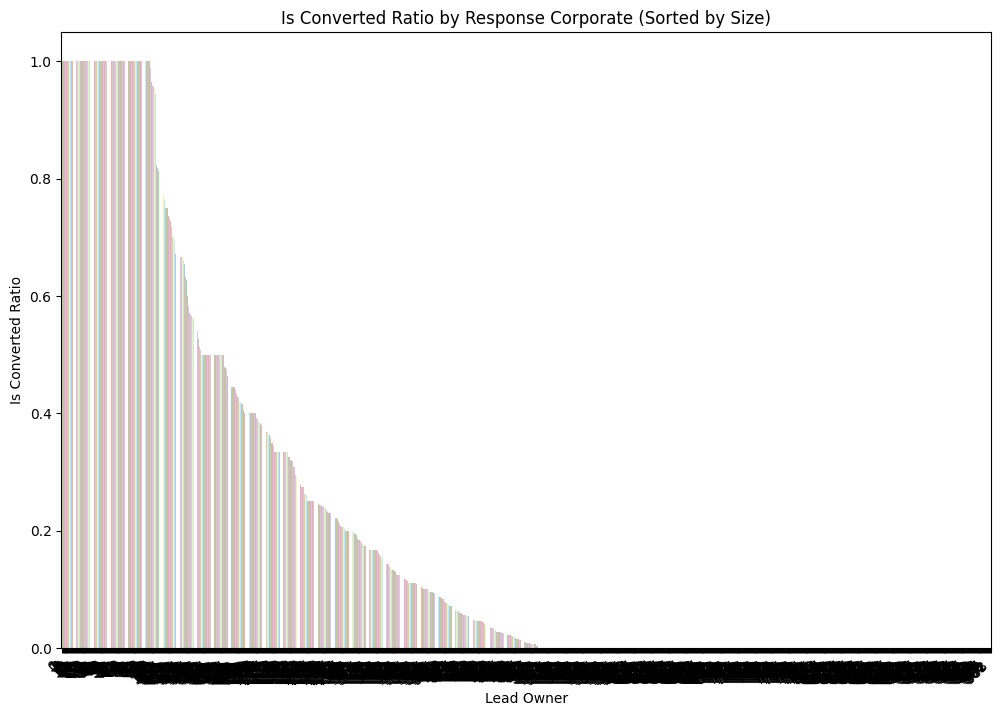

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=class_conversion_ratio_sorted.index, y='is_converted', data=class_conversion_ratio_sorted, palette='pastel')
plt.xlabel('Lead Owner')
plt.ylabel('Is Converted Ratio')
plt.title('Is Converted Ratio by Response Corporate (Sorted by Size)')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.show()

## 영업사원 번호와 빈도수 관계

In [32]:
temp = df['lead_owner'].value_counts()

In [36]:
owner_num = temp.index
freq = temp.values

C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


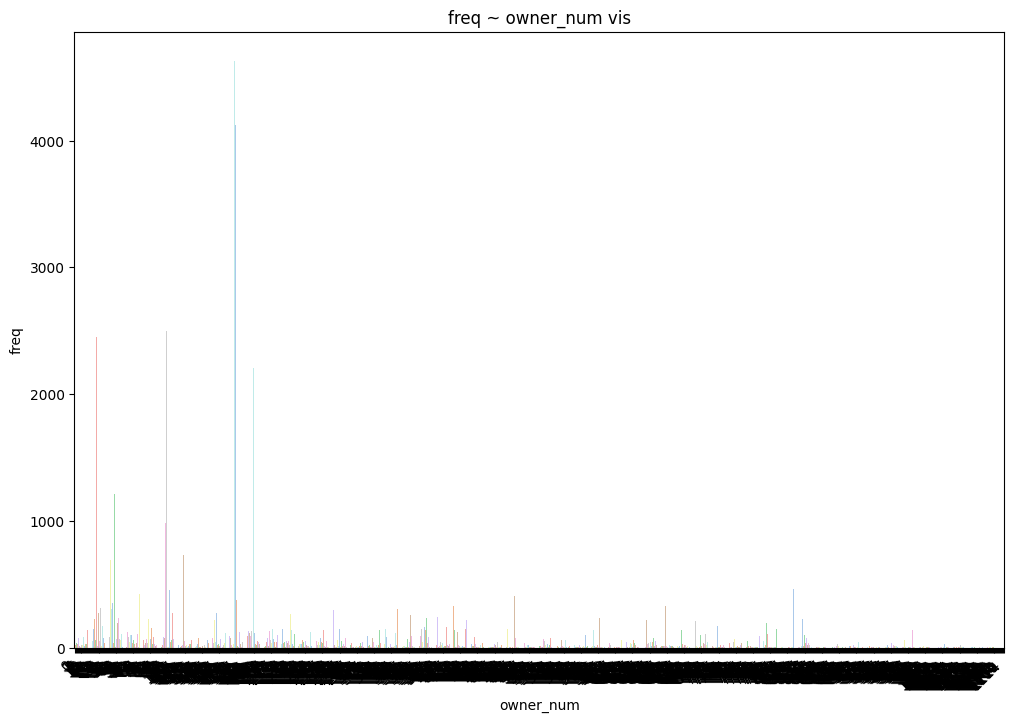

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x=owner_num, y=freq, data=class_conversion_ratio_sorted, palette='pastel')
plt.xlabel('owner_num')
plt.ylabel('freq')
plt.title('freq ~ owner_num vis')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.show()

## 영업 빈도수 - 구매전환율 확인

In [42]:
class_conversion_ratio

,lead_owner,is_converted
0,0,0.046620
1,1,0.750000
2,2,0.325000
3,3,0.379310
4,4,0.789474
...,...,...
979,1106,0.000000
980,1109,0.000000
981,1110,0.000000
982,1111,0.000000


In [43]:
class_conversion_ratio = df.groupby('lead_owner')['is_converted'].mean().reset_index()
merged_df = pd.merge(class_conversion_ratio, temp, on='lead_owner')

In [44]:
merged_df

,lead_owner,is_converted,count
0,0,0.046620,429
1,1,0.750000,20
2,2,0.325000,40
3,3,0.379310,29
4,4,0.789474,76
...,...,...,...
979,1106,0.000000,1
980,1109,0.000000,1
981,1110,0.000000,1
982,1111,0.000000,1


C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Kyeongjun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


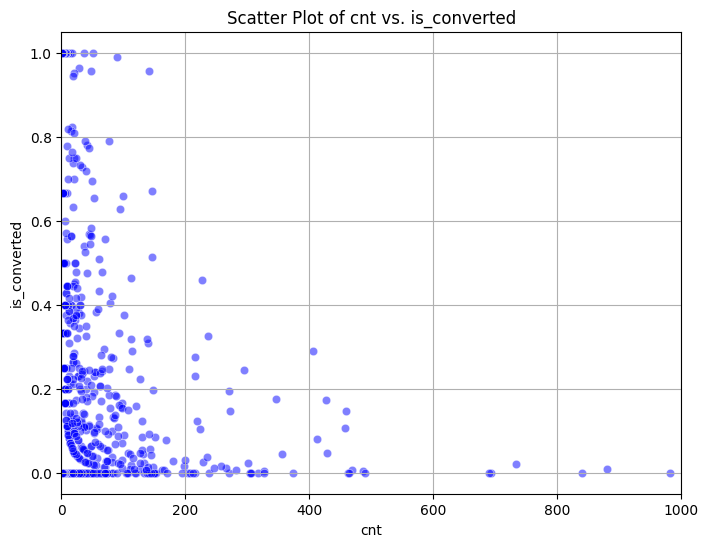

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='count', y='is_converted', color='blue', alpha=0.5)
plt.xlim(0,1000)
plt.xlabel('cnt')
plt.ylabel('is_converted')
plt.title('Scatter Plot of cnt vs. is_converted')
plt.grid(True)
plt.show()

In [52]:
sales_king = merged_df[merged_df['is_converted'] >= 0.8]
print(sales_king)

     lead_owner  is_converted  count
5             5      0.823529     17
128         129      1.000000      2
132         137      1.000000      2
142         147      1.000000     51
147         152      1.000000     36
..          ...           ...    ...
913        1008      1.000000      1
928        1030      1.000000      2
934        1041      1.000000      1
973        1098      1.000000      1
974        1099      1.000000      1

[104 rows x 3 columns]


In [53]:
sales_king.describe()

,lead_owner,is_converted,count
count,104.000000,104.000000,104.000000
mean,625.778846,0.990659,7.230769
std,266.457048,0.036462,17.789618
min,5.000000,0.809524,1.000000
25%,455.500000,1.000000,1.000000
50%,597.000000,1.000000,2.000000
75%,906.750000,1.000000,6.000000
max,1099.000000,1.000000,141.000000


In [60]:
sales_king_sorted = sales_king.sort_values(by='count', ascending=False)

sales_king_sorted.head(20)

,lead_owner,is_converted,count
415,437,0.957447,141
356,375,0.988764,89
142,147,1.000000,51
354,372,0.957447,47
147,152,1.000000,36
416,438,0.964286,28
553,585,0.809524,21
479,501,0.952381,21
777,839,0.944444,18
421,443,1.000000,17
